### Analysis on image labels

In [52]:
import os
import json
import itertools
import numpy as np
import pandas as pd
from pprint import pprint
from os.path import exists as file_exists

# Import the wordcloud library
from wordcloud import WordCloud

from ast import literal_eval

import urllib.request

import nltk; nltk.download('stopwords')
from nltk.corpus import stopwords

import spacy

from nltk.tokenize import word_tokenize

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Draculabites\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
parent = os.path.dirname(os.getcwd())
parent

'C:\\Users\\Draculabites\\Desktop\\IS434 SA G2\\Project\\is434-G6-SCS'

In [54]:
df = pd.read_csv("data/allposts.csv")
df.head()

,postUrl,description,commentCount,likeCount,pubDate,likedByViewer,isSidecar,type,profileUrl,username,...,taggedFullName1,taggedUsername1,taggedFullName2,taggedUsername2,taggedFullName3,taggedUsername3,taggedFullName4,taggedUsername4,location,locationId
0,https://www.instagram.com/p/CbzXkYBsSZ0/,Happy 1st April! This means that… Our Virtual ...,0,12,2022-04-01T09:00:22.000Z,False,False,Photo,https://www.instagram.com/sgchildrensoc,sgchildrensoc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/p/CbhK4IQKwcd/,👀 Take a peep into #adayinthelife of a youth w...,1,36,2022-03-25T07:23:46.000Z,False,False,Video,https://www.instagram.com/sgchildrensoc,sgchildrensoc,...,GIG@JYC,jyc_at_scs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.instagram.com/p/CbeksJWrCPZ/,Singapore Children’s Society held the 1000 Ent...,0,46,2022-03-24T07:10:56.000Z,False,True,Photo,https://www.instagram.com/sgchildrensoc,sgchildrensoc,...,PARKROYAL on Beach Road,parkroyalbeachroad,Teo Chee Hean,teocheehean,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.instagram.com/p/CbeksJWrCPZ/,Singapore Children’s Society held the 1000 Ent...,0,46,2022-03-24T07:10:56.000Z,False,True,Photo,https://www.instagram.com/sgchildrensoc,sgchildrensoc,...,PARKROYAL on Beach Road,parkroyalbeachroad,Teo Chee Hean,teocheehean,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/p/CbeksJWrCPZ/,Singapore Children’s Society held the 1000 Ent...,0,46,2022-03-24T07:10:56.000Z,False,True,Photo,https://www.instagram.com/sgchildrensoc,sgchildrensoc,...,PARKROYAL on Beach Road,parkroyalbeachroad,Teo Chee Hean,teocheehean,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
urls = list(df.imgUrl)

# For parsing into aws
with open('data/urls.json', 'w') as f:
    json.dump(urls, f)

**Move over to AWS Rekognition to get**
1. **image labels** 
2. **text detection**

& then continue from this script

In [56]:
# text_all = []
# with open(f"data/images_text/261.json") as f:
#     lists = json.load(f)
#     for li in lists:
#         temp = []
#         for arr in li:
#             temp.append(arr["DetectedText"])
#         text_all.append(temp)
                      
# len(text_all)

In [57]:
len(df)

1481

In [58]:
text_all = []
for i in [261, 1045, 1481]:
    # check if file exists, i.e. no text detected
    # break out of the loop and continue from the next image
    if not file_exists(f"data/images_text/{i}.json"):
        df.drop(i-1, inplace = True)
        continue
    fp = f"data/images_text/{i}.json"
    with open(fp) as f:
        lists = json.load(f)
        for li in lists:
            temp = []
            for arr in li:
                temp.append(arr["DetectedText"])
            text_all.append(temp)
            
text_all

[["Children 'sv",
  'SOCIET',
  'Caring for the Futuro',
  '7a and',
  'smiles hope',
  'Since 1952',
  'This Virtual Flag Day, drop an e-token of love and pass it on.',
  'Fill a bucket full of hope for those in need today!',
  'Virtual Flag',
  'Day 2022',
  'DONATE',
  'HOPE',
  'Children',
  "'sv",
  'SOCIET',
  'Caring',
  'for the',
  'Futuro',
  '7a',
  'and',
  'smiles',
  'hope',
  'Since',
  '1952',
  'This',
  'Virtual',
  'Flag',
  'Day,',
  'drop',
  'an',
  'e-token',
  'of',
  'love',
  'and',
  'pass',
  'it',
  'on.',
  'Fill',
  'a',
  'bucket',
  'full',
  'of',
  'hope',
  'for',
  'those',
  'in',
  'need',
  'today!',
  'Virtual',
  'Flag',
  'Day',
  '2022',
  'DONATE',
  'HOPE'],
 ['A Day in the',
  'Life of a Youth',
  'Worker From',
  'jyc @',
  "Children's",
  'Society',
  'A',
  'Day',
  'in',
  'the',
  'Life',
  'of',
  'a',
  'Youth',
  'Worker',
  'From',
  'jyc',
  '@',
  "Children's",
  'Society'],
 ['-',
  '70ml and',
  'ENTERPRISES',
  '1000 ENTERPRI

In [59]:
len(text_all)

1481

In [60]:
df['labels'] = text_all
# df['labels'] = df['labels'].apply(lambda x: literal_eval(x))
df["labels_str"] = df['labels'].apply(' '.join)
df = df[['postUrl','commentCount', 'likeCount', 'description', 'labels', 'labels_str']]
df.head(10)

,postUrl,commentCount,likeCount,description,labels,labels_str
0,https://www.instagram.com/p/CbzXkYBsSZ0/,0,12,Happy 1st April! This means that… Our Virtual ...,"[Children 'sv, SOCIET, Caring for the Futuro, ...",Children 'sv SOCIET Caring for the Futuro 7a a...
1,https://www.instagram.com/p/CbhK4IQKwcd/,1,36,👀 Take a peep into #adayinthelife of a youth w...,"[A Day in the, Life of a Youth, Worker From, j...",A Day in the Life of a Youth Worker From jyc @...
2,https://www.instagram.com/p/CbeksJWrCPZ/,0,46,Singapore Children’s Society held the 1000 Ent...,"[-, 70ml and, ENTERPRISES, 1000 ENTERPRISES FO...",- 70ml and ENTERPRISES 1000 ENTERPRISES FOR CH...
3,https://www.instagram.com/p/CbeksJWrCPZ/,0,46,Singapore Children’s Society held the 1000 Ent...,"[ENTE, 1000 ENTERPRISES FOR CHILDREN-IN-NEED, ...",ENTE 1000 ENTERPRISES FOR CHILDREN-IN-NEED CHI...
4,https://www.instagram.com/p/CbeksJWrCPZ/,0,46,Singapore Children’s Society held the 1000 Ent...,[],
5,https://www.instagram.com/p/CbeksJWrCPZ/,0,46,Singapore Children’s Society held the 1000 Ent...,"[1000 ENTERPRISES FOR CHILDREN-IN-NEED, ENTERP...",1000 ENTERPRISES FOR CHILDREN-IN-NEED ENTERPRI...
6,https://www.instagram.com/p/CbeksJWrCPZ/,0,46,Singapore Children’s Society held the 1000 Ent...,"[years, Children, ozime hope, SOCIET, Canno fo...",years Children ozime hope SOCIET Canno for the...
7,https://www.instagram.com/p/CbZBDq6rRnv/,0,38,Today is World Water Day. To raise awareness a...,"[MAKE, SINGA, EVERY, لله, TTR, TYR, CA4458 fee...",MAKE SINGA EVERY لله TTR TYR CA4458 feelfree S...
8,https://www.instagram.com/p/CbW1HoSrDt0/,0,41,"“Hello, I’m Tinkle Friend! What would you like...","[y-Free, -, Onion, -, WA, -, - -, Need someone...",y-Free - Onion - WA - - - Need someone to talk...
9,https://www.instagram.com/p/CbHbKk2rDGb/,1,73,It is World Social Work Day today! We invited ...,"[Bee Joo (the one squatting down), our staff a...","Bee Joo (the one squatting down), our staff an..."


In [61]:
# Preprocessing on captions to make them more amenable for analysis, and reliable results. 
# RegEx to remove any punctuation, and then lowercase the text

# Remove punctuation
df['labels_str'] = df['labels_str'].str.replace(r'[^\w\s]', '')

# Convert to lowercase
df['labels_str'] = df['labels_str'].str.lower()

# Replace null values (no caption) with 'null'
df['labels_str'].fillna('null', inplace = True)

# Print out the first rows of papers
df['labels_str'].head()

C:\Users\Draculabites\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


0    children sv societ caring for the futuro 7a an...
1    a day in the life of a youth worker from jyc  ...
2     70ml and enterprises 1000 enterprises for chi...
3    ente 1000 enterprises for childreninneed child...
4                                                     
Name: labels_str, dtype: object

### What topics are more related to engagement?

Create a metric for engagement by using a weighted sum of # likes and # comments. 

To create an engagement score, use 0.4# likes (normalized) + 0.6# comments (normalized). Define High (1) and Low (0) engagement based on whether the engagement score is above or below the median value.

In [67]:
# normalize # likes and # comments such that they both have values between 0 and 1
# scale the # likes by dividing by the maximum # likes (for a post) an # comments

df["likes_normalized"] = df["likeCount"]/df["likeCount"].max() 
df["comments_normalized"] = df["commentCount"]/df["commentCount"].max()

## Create engagement score
df["engagement_score"] = 0.4 * df["likes_normalized"] + 0.6 * df["comments_normalized"]

engagement_median = df["engagement_score"].median()
print(f'median engagement score: {engagement_median}')
df["engagement"] = df["engagement_score"].apply(lambda x: 1 if x > engagement_median else 0)
df.head(3)

median engagement score: 0.029811320754716982


,postUrl,commentCount,likeCount,description,labels,labels_str,likes_normalized,comments_normalized,engagement_score,engagement
0,https://www.instagram.com/p/CbzXkYBsSZ0/,0,12,Happy 1st April! This means that… Our Virtual ...,"[Children 'sv, SOCIET, Caring for the Futuro, ...",children sv societ caring for the futuro 7a an...,0.022642,0.000000,0.009057,0
1,https://www.instagram.com/p/CbhK4IQKwcd/,1,36,👀 Take a peep into #adayinthelife of a youth w...,"[A Day in the, Life of a Youth, Worker From, j...",a day in the life of a youth worker from jyc ...,0.067925,0.033333,0.047170,1
2,https://www.instagram.com/p/CbeksJWrCPZ/,0,46,Singapore Children’s Society held the 1000 Ent...,"[-, 70ml and, ENTERPRISES, 1000 ENTERPRISES FO...",70ml and enterprises 1000 enterprises for chi...,0.086792,0.000000,0.034717,1


In [77]:
count = 0
count_li = []
for li in text_all:
    if 'groin' in li or 'sexual' in li:
        count_li.append(count)
    count += 1

count_li

[27,
 34,
 407,
 409,
 416,
 581,
 626,
 1019,
 1144,
 1151,
 1154,
 1158,
 1160,
 1164,
 1165]

In [79]:
print(f'median engagement score: {engagement_median}')
df.iloc[[27, 34, 407, 409, 416, 581, 626, 1019, 1144, 1151, 1154, 1158, 1160, 1164, 1165]].engagement_score

median engagement score: 0.029811320754716982


27      0.420000
34      0.420000
407     0.035094
409     0.195849
416     0.195849
581     0.016604
626     0.037358
1019    0.021887
1144    0.056226
1151    0.056226
1154    0.026415
1158    0.026415
1160    0.026415
1164    0.066038
1165    0.066038
Name: engagement_score, dtype: float64

### Topic modeling (LDA) on the image labels. 

Output:
1. A file showing which words load on which topics
2. A file showing topic weights for each image.

Now take the quartiles with highest and lowest engagement scores. What are the differences in the average topic weights of pictures across the two quartiles (e.g., greater proportion of some topics in highest engagement quartile)? Show the main results in a table.

In [12]:
# EDA to transfrom caption into inputs for LDA 
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'us', 'like', 'also', 'society', 'societies', 'sgchildren', 
                   'sgchild', 'sgchildrens', 'sgchildrensoc', 'childrens', 'children', 'childs', 'child', 'singapore', 'social', 
                   'youth', 'help', 'support', 'link', 'bio', 'need', 'ms', 'please', 'day', 'today'])

def to_words(sentences):
    for sentence in sentences:
        # deacc = True removes punctuations
        yield(simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word.lower() not in stop_words] for doc in texts]

data_words = list(to_words(list(df['labels_str'])))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words)
df['tokens'] = data_words

[['sv', 'societ', 'caring', 'futuro', 'smiles', 'hope', 'since', 'virtual', 'flag', 'drop', 'etoken', 'love', 'pass', 'fill', 'bucket', 'full', 'hope', 'virtual', 'flag', 'donate', 'hope', 'sv', 'societ', 'caring', 'futuro', 'smiles', 'hope', 'since', 'virtual', 'flag', 'drop', 'etoken', 'love', 'pass', 'fill', 'bucket', 'full', 'hope', 'virtual', 'flag', 'donate', 'hope'], ['life', 'worker', 'jyc', 'life', 'worker', 'jyc'], ['ml', 'enterprises', 'enterprises', 'childreninneed', 'hope', 'childreninneed', 'lanthropists', 'new', 'philanthropists', 'appreciation', 'ev', 'march', 'inour', 'hean', 'ister', 'curity', 'ml', 'enterprises', 'enterprises', 'childreninneed', 'hope', 'childreninneed', 'lanthropists', 'new', 'philanthropists', 'appreciation', 'ev', 'march', 'inour', 'hean', 'ister', 'curity'], ['ente', 'enterprises', 'childreninneed', 'philanthropists', 'appreciation', 'event', 'march', 'guestofhonour', 'mr', 'teo', 'chee', 'не', 'coordinating', 'min', 'rity', 'ente', 'enterprises'

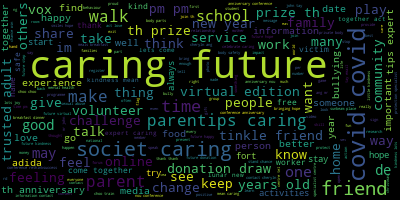

In [13]:
def create_cloud(data):
    text = ','.join(data)

    # Create a WordCloud object
    wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue')

    # Generate a word cloud
    wordcloud.generate(text)
    
    return wordcloud

processed = list(itertools.chain(*data_words))

wordcloud = create_cloud(processed)
# Visualize the word cloud
wordcloud.to_image()

In [14]:
def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod

def get_corpus(df):
    """
    Get Bigram Model, Corpus, id2word mapping
    """
    bigram = bigrams(df['tokens'])
    bigram = [bigram[review] for review in df['tokens']]
    id2word = gensim.corpora.Dictionary(bigram)
    id2word.filter_extremes(no_below=10, no_above=0.35)
    id2word.compactify()
    corpus = [id2word.doc2bow(text) for text in bigram]
    return corpus, id2word, bigram

train_corpus, train_id2word, bigram_train = get_corpus(df)

In [15]:
import logging
logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lda_train = gensim.models.ldamulticore.LdaMulticore(
                           corpus=train_corpus,
                           num_topics=5,
                           id2word=train_id2word,
                           chunksize=100,
                           workers=7, # Num. Processing Cores - 1
                           passes=50,
                           eval_every = 1,
                           per_word_topics=True)
    lda_train.save('results/topic_modelling_images/lda_train.model')

In [16]:
coherence_model_lda = CoherenceModel(model=lda_train, texts=bigram_train, dictionary=train_id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print("The coherence of the LDA model is", coherence_lda)

The coherence of the LDA model is 0.3509435333837358


In [82]:
pprint(lda_train.print_topics())

[(0,
  '0.097*"future" + 0.074*"societ_caring" + 0.043*"caring_future" + '
  '0.029*"bullying" + 0.026*"thank" + 0.024*"vox" + 0.023*"love" + '
  '0.023*"caring" + 0.022*"donation_draw" + 0.022*"dinner"'),
 (1,
  '0.099*"caring_future" + 0.050*"happy" + 0.031*"th" + 0.027*"year" + '
  '0.021*"hope" + 0.020*"good" + 0.020*"tinkle_friend" + 0.019*"one" + '
  '0.018*"since" + 0.016*"experiences"'),
 (2,
  '0.056*"caring_future" + 0.055*"time" + 0.039*"family" + 0.028*"may" + '
  '0.027*"friends" + 0.025*"school" + 0.022*"home" + 0.021*"pm" + 0.020*"play" '
  '+ 0.018*"pm_pm"'),
 (3,
  '0.069*"caring_future" + 0.025*"dont" + 0.022*"parents" + 0.022*"future" + '
  '0.018*"food" + 0.017*"tell" + 0.017*"im" + 0.017*"keep" + 0.017*"online" + '
  '0.016*"give"'),
 (4,
  '0.067*"walk" + 0.029*"covid" + 0.026*"de" + 0.025*"free" + 0.023*"mr" + '
  '0.022*"pm" + 0.022*"event" + 0.020*"caring_future" + 0.020*"join" + '
  '0.020*"september"')]


In [18]:
# # Analyzing LDA model results
# # Visualise for interpretability

# # Better understanding and interpreting individual topics
#     # manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.
# # Better understanding the relationships between the topics.
#     # Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.

# # Visualize the topics
# pyLDAvis.enable_notebook()
# LDAvis_data_filepath = os.path.join('./results/topic_modelling/ldavis_prepared_'+ str(num_topics))

# if True:
#     LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
#     with open(LDAvis_data_filepath, 'wb') as f:
#         pickle.dump(LDAvis_prepared, f)
        
# # load the pre-prepared pyLDAvis data from disk
# with open(LDAvis_data_filepath, 'rb') as f:
#     LDAvis_prepared = pickle.load(f)

# pyLDAvis.save_html(LDAvis_prepared, './results/topic_modelling/ldavis_prepared_'+ str(num_topics) +'.html')

# LDAvis_prepared

vis = gensimvis.prepare(topic_model=lda_train, corpus=train_corpus, dictionary=train_id2word)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

C:\Users\Draculabites\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [80]:
df_lda = pd.DataFrame(lda_train.show_topics(), columns=['Topic','Word Weights'])
inferred_topics = ["Societal care on bullying", "Caring with Tinkle Friend", "Caring with Family, Friends and School", "Caring from Mainly Parents", "Event/ Programmes"]
rank = [4, 3, 2, 1, 5]
df_lda['Inferred Topics'] = inferred_topics
df_lda['Topic Ranking'] = rank
df_lda.sort_values('Topic Ranking', inplace = True)
df_lda.head()

,Topic,Word Weights,Inferred Topics,Topic Ranking
3,3,"0.069*""caring_future"" + 0.025*""dont"" + 0.022*""...",Caring from Mainly Parents,1
2,2,"0.056*""caring_future"" + 0.055*""time"" + 0.039*""...","Caring with Family, Friends and School",2
1,1,"0.099*""caring_future"" + 0.050*""happy"" + 0.031*...",Caring with Tinkle Friend,3
0,0,"0.097*""future"" + 0.074*""societ_caring"" + 0.043...",Societal care on bullying,4
4,4,"0.067*""walk"" + 0.029*""covid"" + 0.026*""de"" + 0....",Event/ Programmes,5


In [20]:
df_lda.to_csv('results/topic_modelling_images/Word_Weights_images.csv')

In [21]:
train_vecs = []
for i in range(len(df['tokens'])):
    # returns the topic distribution for the given document
    top_topics = lda_train.get_document_topics(train_corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(5)]
    train_vecs.append(topic_vec)
    
print(train_vecs[5])
print(len(train_vecs))

[0.06666736, 0.06666736, 0.06666733, 0.06666726, 0.73333067]
1481


In [22]:
top_topics

[(0, 0.2), (1, 0.2), (2, 0.2), (3, 0.2), (4, 0.2)]

In [23]:
train_vec_df=pd.DataFrame(train_vecs)
# train_vec_df.columns=['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']
train_vec_df.columns=['topic0','topic1','topic2','topic3','topic4']
train_vec_df.iloc[31]

topic0    0.182981
topic1    0.576804
topic2    0.222602
topic3    0.008865
topic4    0.008748
Name: 31, dtype: float32

In [24]:
df_final=pd.concat([df.reset_index(drop=True), train_vec_df.reset_index(drop=True)], axis=1)
df_final.head()

,postUrl,commentCount,likeCount,description,labels,labels_str,likes_normalized,comments_normalized,engagement_score,engagement,tokens,topic0,topic1,topic2,topic3,topic4
0,https://www.instagram.com/p/CbzXkYBsSZ0/,0,12,Happy 1st April! This means that… Our Virtual ...,"[Children 'sv, SOCIET, Caring for the Futuro, ...",children sv societ caring for the futuro 7a an...,0.022642,0.000000,0.009057,0,"[sv, societ, caring, futuro, smiles, hope, sin...",0.123204,0.384104,0.476517,0.008029,0.008147
1,https://www.instagram.com/p/CbhK4IQKwcd/,1,36,👀 Take a peep into #adayinthelife of a youth w...,"[A Day in the, Life of a Youth, Worker From, j...",a day in the life of a youth worker from jyc ...,0.067925,0.033333,0.047170,1,"[life, worker, jyc, life, worker, jyc]",0.028572,0.599985,0.314216,0.028625,0.028601
2,https://www.instagram.com/p/CbeksJWrCPZ/,0,46,Singapore Children’s Society held the 1000 Ent...,"[-, 70ml and, ENTERPRISES, 1000 ENTERPRISES FO...",70ml and enterprises 1000 enterprises for chi...,0.086792,0.000000,0.034717,1,"[ml, enterprises, enterprises, childreninneed,...",0.028954,0.029393,0.884362,0.028676,0.028615
3,https://www.instagram.com/p/CbeksJWrCPZ/,0,46,Singapore Children’s Society held the 1000 Ent...,"[ENTE, 1000 ENTERPRISES FOR CHILDREN-IN-NEED, ...",ente 1000 enterprises for childreninneed child...,0.086792,0.000000,0.034717,1,"[ente, enterprises, childreninneed, philanthro...",0.018183,0.018471,0.018887,0.018188,0.926271
4,https://www.instagram.com/p/CbeksJWrCPZ/,0,46,Singapore Children’s Society held the 1000 Ent...,[],,0.086792,0.000000,0.034717,1,[],0.200000,0.200000,0.200000,0.200000,0.200000


In [25]:
df_final.to_csv("results/topic_modelling_images/Topic_Weights_images.csv")

In [26]:
q1=np.percentile(df_final.engagement_score, 25) 
q2=np.percentile(df_final.engagement_score, 50)  
q3=np.percentile(df_final.engagement_score, 75)

print (q1,q2,q3)

0.018113207547169812 0.029811320754716982 0.046037735849056606


In [27]:
top_quartile=df_final[df_final['engagement_score']>q3]
top_quartile.head(3)

,postUrl,commentCount,likeCount,description,labels,labels_str,likes_normalized,comments_normalized,engagement_score,engagement,tokens,topic0,topic1,topic2,topic3,topic4
1,https://www.instagram.com/p/CbhK4IQKwcd/,1,36,👀 Take a peep into #adayinthelife of a youth w...,"[A Day in the, Life of a Youth, Worker From, j...",a day in the life of a youth worker from jyc ...,0.067925,0.033333,0.047170,1,"[life, worker, jyc, life, worker, jyc]",0.028572,0.599985,0.314216,0.028625,0.028601
9,https://www.instagram.com/p/CbHbKk2rDGb/,1,73,It is World Social Work Day today! We invited ...,"[Bee Joo (the one squatting down), our staff a...",bee joo the one squatting down our staff and v...,0.137736,0.033333,0.075094,1,"[bee, joo, one, squatting, staff, volunteer, e...",0.377085,0.101599,0.507340,0.007005,0.006972
10,https://www.instagram.com/p/CbHbKk2rDGb/,1,73,It is World Social Work Day today! We invited ...,"[Bee Joo with Ms Gaja, one of Children's Socie...",bee joo with ms gaja one of childrens society ...,0.137736,0.033333,0.075094,1,"[bee, joo, gaja, one, pioneer, workers, gaja, ...",0.837237,0.041043,0.040475,0.041095,0.040150


In [28]:
average_topic_weights_top = top_quartile[["topic0",'topic1',"topic2",'topic3',"topic4"]].mean(axis=0)
average_topic_weights_top

topic0    0.189323
topic1    0.173284
topic2    0.187560
topic3    0.289824
topic4    0.160010
dtype: float32

In [29]:
bottom_quartile=df_final[df_final['engagement_score']<q1]
bottom_quartile.head(3)

,postUrl,commentCount,likeCount,description,labels,labels_str,likes_normalized,comments_normalized,engagement_score,engagement,tokens,topic0,topic1,topic2,topic3,topic4
0,https://www.instagram.com/p/CbzXkYBsSZ0/,0,12,Happy 1st April! This means that… Our Virtual ...,"[Children 'sv, SOCIET, Caring for the Futuro, ...",children sv societ caring for the futuro 7a an...,0.022642,0.0,0.009057,0,"[sv, societ, caring, futuro, smiles, hope, sin...",0.123204,0.384104,0.476517,0.008029,0.008147
16,https://www.instagram.com/p/Caoe0jUsfQh/,0,14,Food insecurity refers to a state where one la...,"[Children's, SOCIETY, 70 smiles, and hope, Car...",childrens society 70 smiles and hope caring fo...,0.026415,0.0,0.010566,0,"[smiles, hope, caring, future, since, lowincom...",0.018234,0.412121,0.018250,0.533166,0.018229
17,https://www.instagram.com/p/Cal6BHIPdm7/,0,7,What do you do when you suspect that child abu...,"[Children S, SOCIETY, Caring for the Future, 7...",children s society caring for the future 70 ho...,0.013208,0.0,0.005283,0,"[caring, future, hope, smiles, since, decision...",0.018242,0.690181,0.018327,0.255028,0.018221


In [30]:
average_topic_weights_bot = bottom_quartile[["topic0",'topic1',"topic2",'topic3',"topic4"]].mean(axis=0)
average_topic_weights_bot

topic0    0.186323
topic1    0.232318
topic2    0.198072
topic3    0.202718
topic4    0.180569
dtype: float32

In [31]:
quartile_topics = pd.concat([average_topic_weights_top,average_topic_weights_bot],axis=1)
quartile_topics.columns = ['Top Quartile','Bottom Quartile']
quartile_topics

,Top Quartile,Bottom Quartile
topic0,0.189323,0.186323
topic1,0.173284,0.232318
topic2,0.187560,0.198072
topic3,0.289824,0.202718
topic4,0.160010,0.180569


In [81]:
difference = (quartile_topics['Bottom Quartile'] - quartile_topics['Top Quartile'])/ quartile_topics['Top Quartile'] * 100
diff = [str(round(d, 3)) for d in list(abs(difference))]
quartile_topics['% difference'] = diff
quartile_topics['Inferred Topics'] = inferred_topics
quartile_topics['Ranking Topics'] = rank
quartile_topics

,Top Quartile,Bottom Quartile,% difference,Inferred Topics,Ranking Topics
topic0,0.189323,0.186323,1.585,Societal care on bullying,4
topic1,0.173284,0.232318,34.068,Caring with Tinkle Friend,3
topic2,0.187560,0.198072,5.604,"Caring with Family, Friends and School",2
topic3,0.289824,0.202718,30.055,Caring from Mainly Parents,1
topic4,0.160010,0.180569,12.849,Event/ Programmes,5
